# **Import libraries**

In [1]:
%matplotlib inline 

import MRD
import os
import re
import numpy as np


import matplotlib.pyplot as plt
from tqdm import tqdm


## Dataset path
###  **  SOS - Correct the path in the MRD package 

In [2]:
rootPathMRD = 'O:\\Projects & users applications\\Denoise\\Dataset\\MRDtest\\' # dataset path

# Upload original MRD file  

In [3]:
# Get Subject and Scan ID

current_directory = os.path.dirname(rootPathMRD)
print(current_directory)
scan_ids = []
subject_ids = []

for path, dirs, files in os.walk(current_directory):
    if len(dirs) == 0:
        for file in files:
            if re.search("\.(MRD)$", file):
                scan_id_i = os.path.basename(path)
                scan_ids.append(scan_id_i)
                subject_id_i = os.path.basename(os.path.normpath(path + os.sep + os.pardir))
                subject_ids.append(subject_id_i)


O:\Projects & users applications\Denoise\Dataset\MRDtest


In [4]:
print(np.shape(subject_ids))
print(np.shape(scan_ids))

print(subject_ids)
print(scan_ids)

(19,)
(19,)
['1353', '1353', '1285', '1344', '1344', '1344', '1344', '1344', '1350', '1350', '1350', '1350', '1350', '1351', '1352', '1352', '1352', '1352', '1352']
['18789', '18793', '17874', '18774', '18815', '18856', '18861', '18862', '18797', '18801', '18847', '18852', '18853', '18783', '18805', '18809', '18838', '18843', '18844']


In [5]:
# get MRD file
def get_mrd(subject_ids=None,scan_ids=None):
    im_file = []
    k_space_file = []
    for i in tqdm(range(0,len(scan_ids))):
        mouse_id = subject_ids[i]
        scan_id = scan_ids[i]
        try:
            [k_space, im ]= MRD.recon_mrd_fse2d(mouse_id=mouse_id, scan_id=scan_id)
            for slice in range(1,np.shape(im)[0]):
                im_slice = im[slice,:,:]
                im_slice.resize(256,256) # resize the data to have the same length
                k_space_slice = k_space[slice,:,:]
                k_space_slice.resize(256,256) # resize the data to have the same length

                im_file.append(im_slice)
                k_space_file.append(k_space_slice)
        except (TypeError,IndexError,ValueError,KeyError,EOFError):
            # print('Error' + mouse_id + scan_id )
            pass
            
    return im_file, k_space_file

In [6]:
# load all the availbale MRD file
im_file = []
k_space_file = []
im_file, k_space_file = get_mrd(subject_ids=subject_ids,scan_ids=scan_ids) 

  0%|                                                                                           | 0/19 [00:00<?, ?it/s]

O:\Projects & users applications\Denoise\Dataset\MRDtest\1353\18789\18789


  5%|████▎                                                                              | 1/19 [00:02<00:51,  2.88s/it]

O:\Projects & users applications\Denoise\Dataset\MRDtest\1353\18793\18793


 11%|████████▋                                                                          | 2/19 [00:05<00:49,  2.90s/it]

O:\Projects & users applications\Denoise\Dataset\MRDtest\1285\17874\17874


 16%|█████████████                                                                      | 3/19 [00:10<00:57,  3.58s/it]

O:\Projects & users applications\Denoise\Dataset\MRDtest\1344\18774\18774


 21%|█████████████████▍                                                                 | 4/19 [00:11<00:40,  2.70s/it]

O:\Projects & users applications\Denoise\Dataset\MRDtest\1344\18815\18815


 26%|█████████████████████▊                                                             | 5/19 [00:14<00:37,  2.70s/it]

O:\Projects & users applications\Denoise\Dataset\MRDtest\1344\18856\18856


 32%|██████████████████████████▏                                                        | 6/19 [00:16<00:34,  2.68s/it]

O:\Projects & users applications\Denoise\Dataset\MRDtest\1344\18861\18861


 37%|██████████████████████████████▌                                                    | 7/19 [00:19<00:32,  2.68s/it]

O:\Projects & users applications\Denoise\Dataset\MRDtest\1344\18862\18862


 42%|██████████████████████████████████▉                                                | 8/19 [00:22<00:30,  2.77s/it]

O:\Projects & users applications\Denoise\Dataset\MRDtest\1350\18797\18797


 47%|███████████████████████████████████████▎                                           | 9/19 [00:25<00:27,  2.71s/it]

O:\Projects & users applications\Denoise\Dataset\MRDtest\1350\18801\18801


 53%|███████████████████████████████████████████▏                                      | 10/19 [00:27<00:24,  2.69s/it]

O:\Projects & users applications\Denoise\Dataset\MRDtest\1350\18847\18847


 58%|███████████████████████████████████████████████▍                                  | 11/19 [00:30<00:21,  2.66s/it]

O:\Projects & users applications\Denoise\Dataset\MRDtest\1350\18852\18852


 63%|███████████████████████████████████████████████████▊                              | 12/19 [00:33<00:19,  2.78s/it]

O:\Projects & users applications\Denoise\Dataset\MRDtest\1350\18853\18853


 68%|████████████████████████████████████████████████████████                          | 13/19 [00:35<00:16,  2.72s/it]

O:\Projects & users applications\Denoise\Dataset\MRDtest\1351\18783\18783


 74%|████████████████████████████████████████████████████████████▍                     | 14/19 [00:38<00:13,  2.70s/it]

O:\Projects & users applications\Denoise\Dataset\MRDtest\1352\18805\18805


 79%|████████████████████████████████████████████████████████████████▋                 | 15/19 [00:41<00:10,  2.67s/it]

O:\Projects & users applications\Denoise\Dataset\MRDtest\1352\18809\18809


 84%|█████████████████████████████████████████████████████████████████████             | 16/19 [00:43<00:08,  2.68s/it]

O:\Projects & users applications\Denoise\Dataset\MRDtest\1352\18838\18838


 89%|█████████████████████████████████████████████████████████████████████████▎        | 17/19 [00:46<00:05,  2.67s/it]

O:\Projects & users applications\Denoise\Dataset\MRDtest\1352\18843\18843


 95%|█████████████████████████████████████████████████████████████████████████████▋    | 18/19 [00:49<00:02,  2.76s/it]

O:\Projects & users applications\Denoise\Dataset\MRDtest\1352\18844\18844


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:52<00:00,  2.75s/it]


In [7]:
# store into numpy array
k_space_file = np.array(k_space_file)
im_file = np.array(im_file)
print(im_file.shape)
print(k_space_file.shape)

(192, 256, 256)
(192, 256, 256)


# Plot Original file

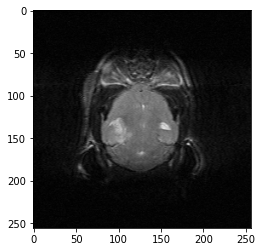

In [41]:
ind = 130
ks_test = k_space_file[ind,:,:]
im_test = MRD.recon_corrected_kspace(corrected_kspace=ks_test)
plt.imshow(im_test, cmap='gray')

Original Image


<ipython-input-9-cf5adba095ff>:5: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(abs(k_space_file[ind,:,:])), cmap='gray')


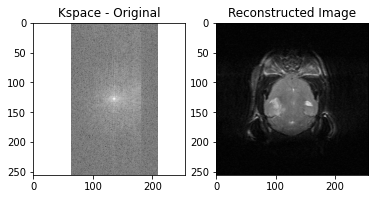

In [9]:
# Plot Original Image
print('Original Image')
plt.subplot(121)
plt.title("Kspace - Original")
plt.imshow(np.log(abs(k_space_file[ind,:,:])), cmap='gray')
plt.subplot(122)
plt.title("Reconstructed Image")
plt.imshow(abs(im_file[ind,:,:]), cmap='gray')

# Modify kspace 

## Apply Hannining filter

In [10]:
ind = 130

(1, 256, 256)
Hanning Filter


<ipython-input-11-e7c98ddabf82>:9: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(abs(hanning_k_space[0,:,:])), cmap='gray')


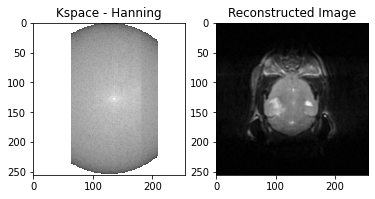

In [11]:
ks = np.zeros((1,np.shape(k_space_file)[1],np.shape(k_space_file)[2]), dtype=complex)
ks[0,:,:] = k_space_file[ind,:,:]
print(ks.shape)
[hanning_im, hanning_k_space] = MRD.hanning_filter(ks3d=ks) 
# Plot Hanning Filter 
print('Hanning Filter')
plt.subplot(121)
plt.title("Kspace - Hanning")
plt.imshow(np.log(abs(hanning_k_space[0,:,:])), cmap='gray')
plt.subplot(122)
plt.title("Reconstructed Image")
plt.imshow(hanning_im[0,:,:], cmap='gray')

##   Apply Noise 

Noisy Image


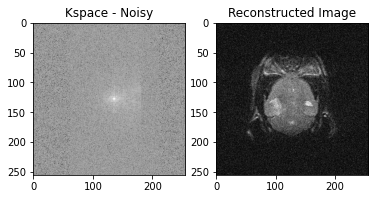

In [28]:
import MRD
ks = np.zeros((1,np.shape(k_space_file)[1],np.shape(k_space_file)[2]), dtype=complex)
ks[0,:,:] = k_space_file[ind,:,:]
[noisy_im, k_space_noisy] = MRD.add_noise_artifacts(ks3d=ks)
# Plot Noisy Image 
print('Noisy Image')
plt.subplot(121)
plt.title("Kspace - Noisy")
plt.imshow(np.log(abs(k_space_noisy[0,:,:])), cmap='gray')
plt.subplot(122)
plt.title("Reconstructed Image")
plt.imshow(noisy_im[0,:,:], cmap='gray')

## Apply  Motion Artifact

Motion Artifact


<ipython-input-40-b32a08c13cd1>:8: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(abs(k_space_motion[0,:,:])), cmap='gray')


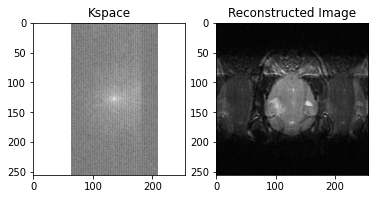

In [40]:
ks = np.zeros((1,np.shape(k_space_file)[1],np.shape(k_space_file)[2]), dtype=complex)
ks[0,:,:] = k_space_file[ind,:,:]
[motion_im, k_space_motion] = MRD.add_motion_artifacts(ks3d=ks)
# Plot Motion Artifact 
print('Motion Artifact')
plt.subplot(121)
plt.title("Kspace")
plt.imshow(np.log(abs(k_space_motion[0,:,:])), cmap='gray')
plt.subplot(122)
plt.title("Reconstructed Image")
plt.imshow(motion_im[0,:,:], cmap='gray')